# Previsão de Séries Temporais

**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dados

### Passageiros Aéreos

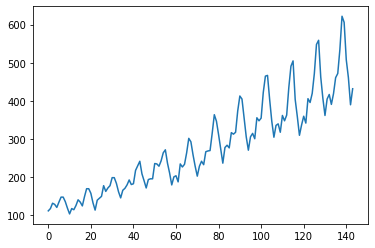

In [ ]:
st1 = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
st1 = st1['Passengers'].values

plt.plot(st1)


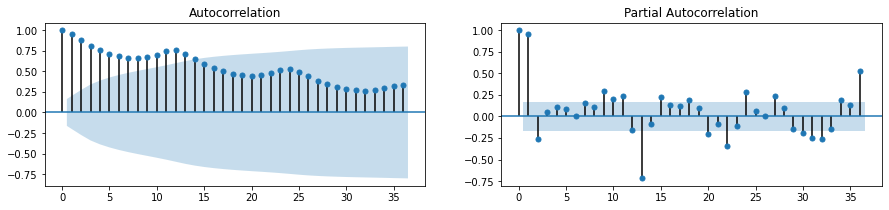

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,3))

_ = plot_acf(st1, lags=36, ax=ax[0])
_ = plot_pacf(st1, lags=36, ax=ax[1])

### Dow Jones

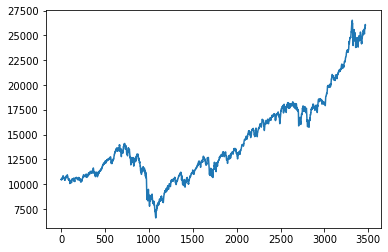

In [ ]:
st2 = pd.read_csv('https://query.data.world/s/mcwvp7zb7monq3kisbbwauo6tffapt', sep=',')
st2 = st2['AVG'].values[5000:]

plt.plot(st2)

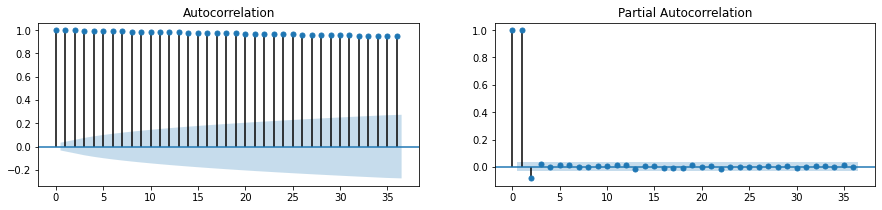

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,3))

_ = plot_acf(st2, lags=36, ax=ax[0])
_ = plot_pacf(st2, lags=36, ax=ax[1])

## Avaliação de Modelos

In [ ]:
from scipy.stats import probplot
import pylab 

def mse(originais, previsoes):
  return np.sum( (originais - previsoes) ** 2 ) / len(originais)

def rmse(originais, previsoes):
  return np.sqrt( mse(originais, previsoes) ) 

def nrmse(originais, previsoes):
  amplitude = np.max(originais) - np.min(originais)
  return rmse(originais, previsoes) / amplitude

def mape(originais, previsoes):
  return (np.sum( np.abs(originais - previsoes) / np.abs(originais) ) / len(originais)) * 100

def u(originais, previsoes):
  n = len(originais)
  ret = 0
  for i in range(1, n):
    ret += np.abs(originais[i] - previsoes[i]) / np.abs(originais[i] - originais[i-1])
  return ret/n

def r2(originais, previsoes):
  mx = np.mean(originais)
  num = np.sum( (originais - previsoes) ** 2 )
  den = np.sum( (originais - mx) ** 2 )
  
  return 1 - num/den

def mde(originais, previsoes):
  a = np.sign( originais[1:] - previsoes[:-1] )
  b = np.sign( originais[:-1] - originais[1:] )
  return np.sum(np.where(a == b, 1, 0)) / len(originais)

def medir(originais, previsoes, ordem):
  return pd.DataFrame([[mse(originais[ordem:], previsoes), rmse(originais[ordem:], previsoes), \
                       nrmse(originais[ordem:], previsoes), mape(originais[ordem:], previsoes), \
                       u(originais[ordem:], previsoes), r2(originais[ordem:], previsoes), 
                       mde(originais[ordem:], previsoes)]], \
                      columns=['MSE','RMSE','nRMSE','MAPE','U','R2','MDE'] )


def analise_residuos(originais, previsoes, ordem):
  
  residuos = originais[ordem:] - previsoes

  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  # ACF
  ax[0].plot(residuos)
  ax[0].set_title("Resíduos")

  # ACF
  plot_acf(residuos, lags=20, ax=ax[1])
  ax[1].set_title("ACF")
  
  # Q-Q Plot
  probplot(residuos, dist="norm", plot=ax[2])
  ax[2].set_title("Quantil-Quantil")

  plt.tight_layout()


## Modelos de Previsão

In [ ]:
def treinar_avaliar(dados, percentual, metodo_treino, metodo_inferencia, hiperparametros,ordem):
  # Tamanho dos dados
  n = len(dados)

  # Divisão Treino/Teste
  split = int(n * percentual)
  treino = dados[:split]
  teste = dados[split-ordem:]

  # Chama o método de treinamento do modelo
  parametros = metodo_treino(treino, hiperparametros)

  # Calcula as previsões dentro da amostra
  previsoes_insample = metodo_inferencia(treino, parametros)

  # Calcular as previsões fora da amostra
  previsoes_outsample = metodo_inferencia(teste, parametros)

  fig, ax = plt.subplots(1, 1, figsize=(15, 5))

  ax.plot(range(0,n), dados, label='Original')
  ax.vlines([split],[np.min(dados)],[np.max(dados)]) # Mostra onde começam os dados de treino
  ax.plot(range(ordem,split), previsoes_insample, label='Previsão In Sample')
  ax.plot(range(split, n), previsoes_outsample, label='Previsão Out Sample')

  plt.legend()

  return teste, previsoes_outsample

### Naïve

In [ ]:
def naive(dados, parametros):
  ret = np.zeros(len(dados)-1)  
  ret = dados[:-1]
  return ret

#### Passageiros

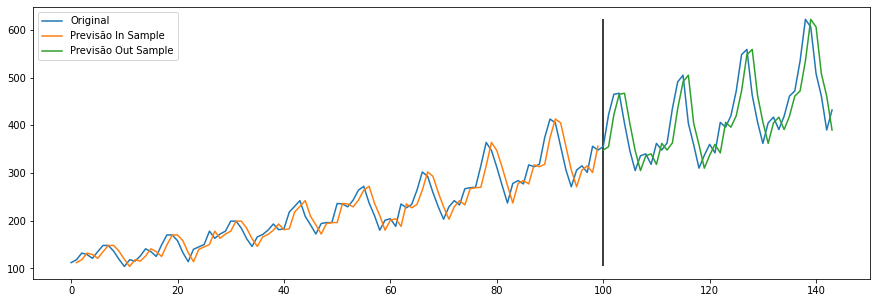

In [ ]:
naive_treinar = lambda Y,P: None

original, previsto = treinar_avaliar(st1, .7, naive_treinar, naive, None, 1)

In [ ]:
medir(original, previsto, ordem=1)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,2441.272727,49.409237,0.155865,9.921519,0.977273,0.582265,0.181818


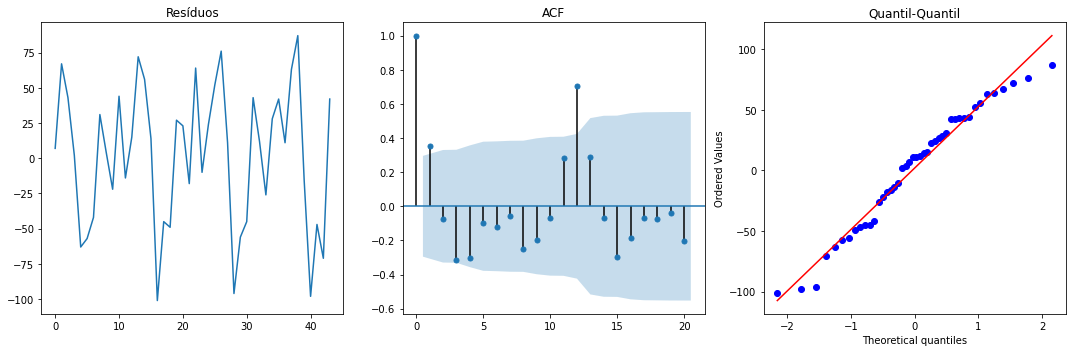

In [ ]:
analise_residuos(original, previsto, 1)

#### Dow Jones


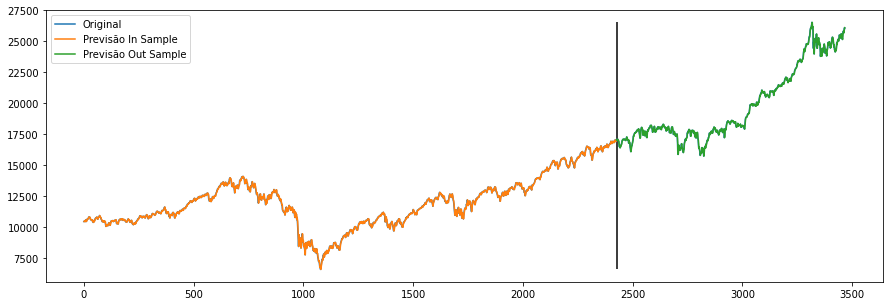

In [ ]:
naive_treinar = lambda Y,P: None
original, previsto = treinar_avaliar(st2, .7, naive_treinar, naive, None, 1)

In [ ]:
medir(original, previsto, ordem=1)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,14943.621138,122.244105,0.011328,0.427214,0.999039,0.998307,0.185399


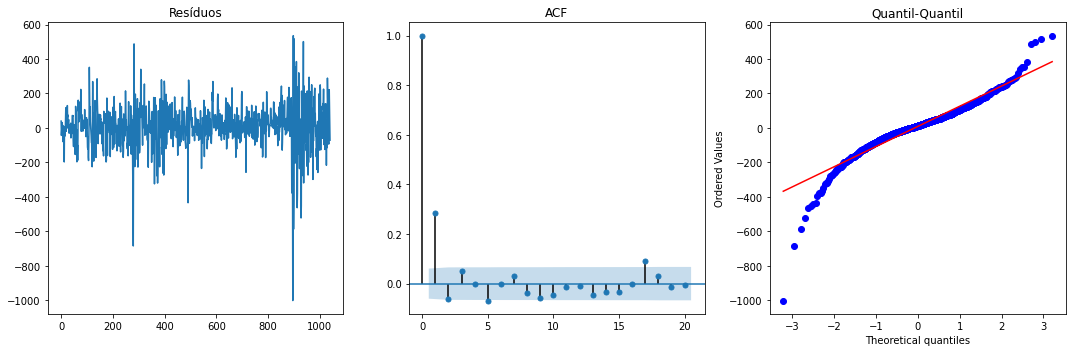

In [ ]:
analise_residuos(original, previsto, 1)

### AR(p) - Modelo AutoRegressivo

In [ ]:
def lags(dados, p):
  n = len(dados)
  X = np.zeros((n-p, p))
  Y = dados[p:]
  for i in range(p, n):
    X[i-p,:] = dados[i-p:i]
  return X,Y

def ajustar_ar(dados, parametros):
  p = parametros[0]
  X,Y = lags(dados, p)
  coef = np.linalg.inv(X.T.dot(X)).dot( X.T.dot(Y) )
  return coef 

def ar(dados, coef):
  p = len(coef)
  n = len(dados)
  ret = np.zeros(n-p)
  for i in range(p,n):
    ret[i-p] = dados[i-p:i].dot(coef)

  return ret


In [ ]:
amostra = st1[:10]
lags(amostra, 5)

(array([[112., 118., 132., 129., 121.],
        [118., 132., 129., 121., 135.],
        [132., 129., 121., 135., 148.],
        [129., 121., 135., 148., 148.],
        [121., 135., 148., 148., 136.]]), array([135, 148, 148, 136, 119]))

#### Passageiros

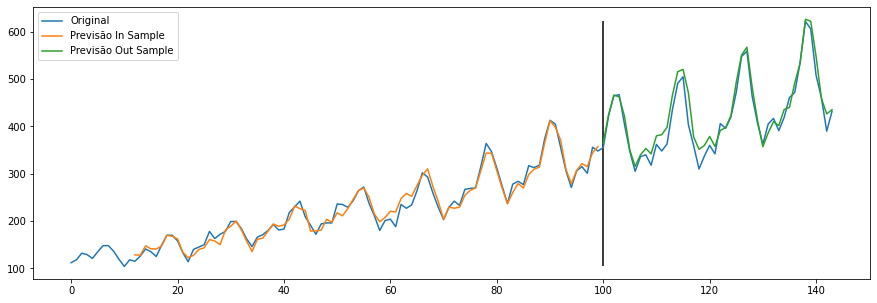

In [ ]:
original, previsto = treinar_avaliar(st1, .7, ajustar_ar, ar, [12], 12)

In [ ]:
medir(original, previsto, ordem=12)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,447.037831,21.143269,0.066698,4.077146,0.630128,0.923506,0.113636


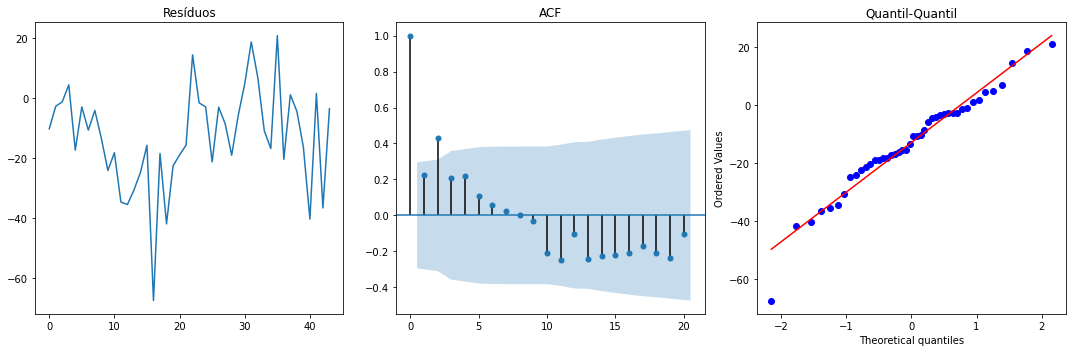

In [ ]:
analise_residuos(original, previsto, 12)

#### Dow Jones

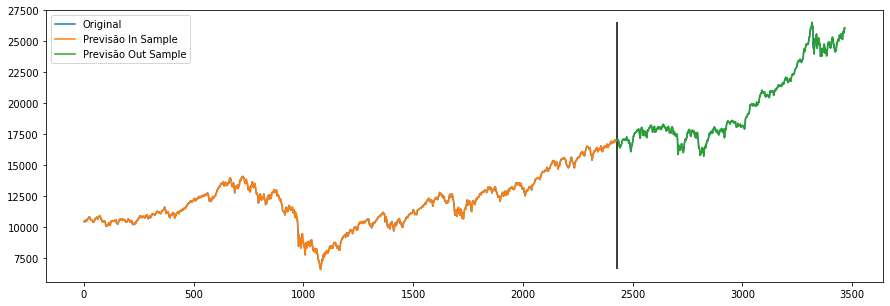

In [ ]:
original, previsto = treinar_avaliar(st2, .7, ajustar_ar, ar, [1], 1)

In [ ]:
medir(original, previsto, ordem=1)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,14883.448032,121.997738,0.011305,0.424976,1.159242,0.998314,0.189241


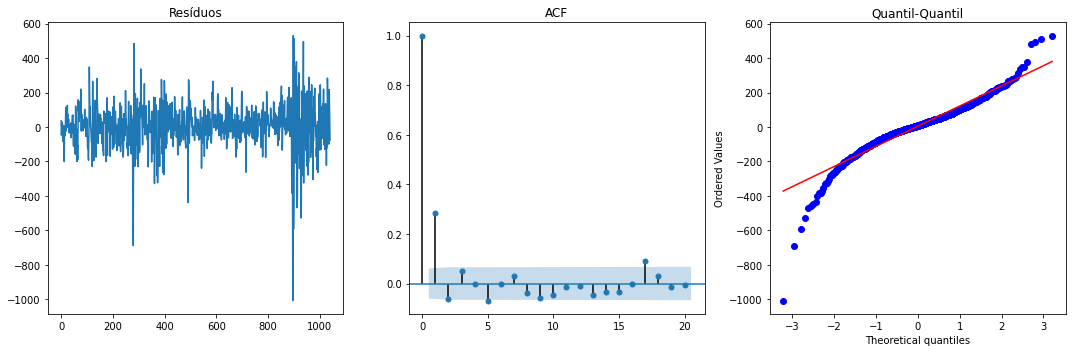

In [ ]:
analise_residuos(original, previsto, 1)

### MA(q) - Médias Móveis

#### Passageiros

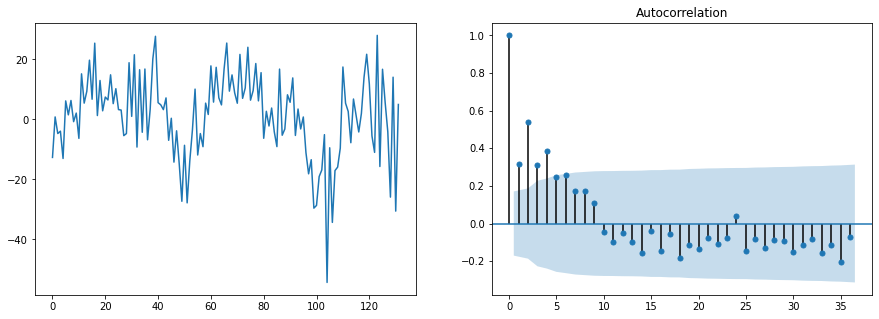

In [ ]:
p = 12

coef = ajustar_ar(st1, [p])

previsoes = ar(st1, coef)

residuos = st1[p:] - previsoes

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(residuos)
_ = plot_acf(residuos, lags=36, ax=ax[1])

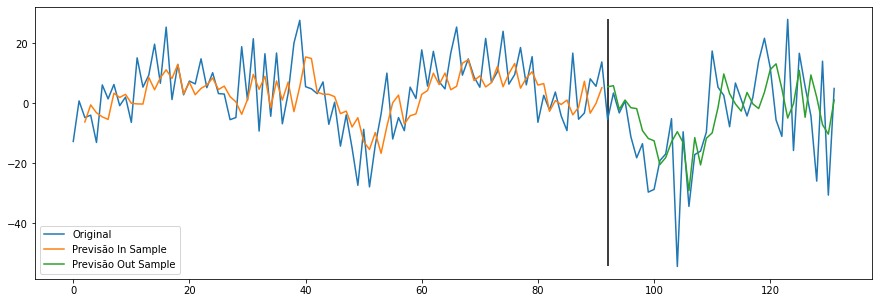

In [ ]:
original, previsto = treinar_avaliar(residuos, .7, ajustar_ar, ar, [2], 2)

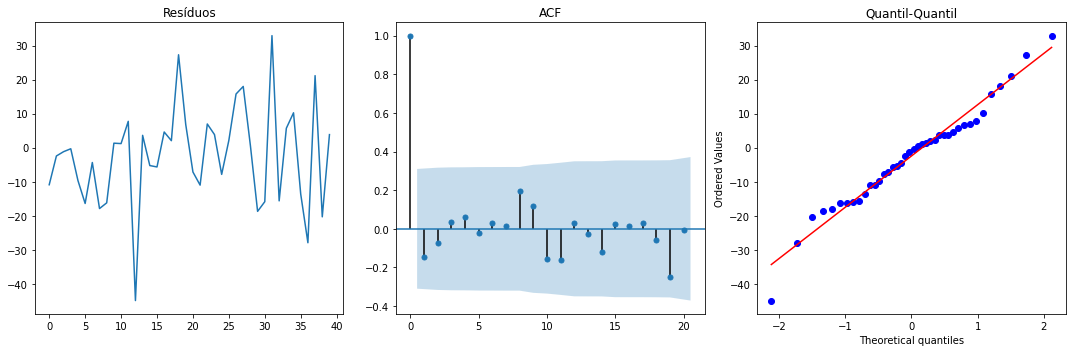

In [ ]:
analise_residuos(original, previsto, 2)

### Modelo ARMA(p, q)


In [ ]:
def ajustar_arma(dados, parametros):
  p, q = parametros

  # Ajusta o Modelo AR(p)
  alfa = ajustar_ar(dados, [p])

  # Gera as estimativas usando o AR(p)
  previsoes = ar(dados, alfa)
  
  # Resíduos do modelo AR(p)
  residuos_ar = dados[p:] - previsoes
  
  # Ajusta o Modelo MA(q)
  beta = ajustar_ar(residuos_ar, [q])

  # Gera as estimativas dos resíduos usando o MA(q)
  previsoes_ma = ar(residuos_ar, beta)

  # Resíduos finais
  residuos_ma = residuos_ar[q:] - previsoes_ma

  # Calcula o desvio padrão dos resíduos finais
  sigma = np.std(residuos_ma)

  return alfa, beta, sigma

def arma(dados, parametros):
  alfa, beta, sigma = parametros
  p = len(alfa)
  q = len(beta)

  previsoes_ar = ar(dados, alfa)
  residuos_ar = dados[p:] - previsoes_ar

  previsoes_ma = ar(residuos_ar, beta)
  return previsoes_ar[q:] + previsoes_ma



#### Passageiros

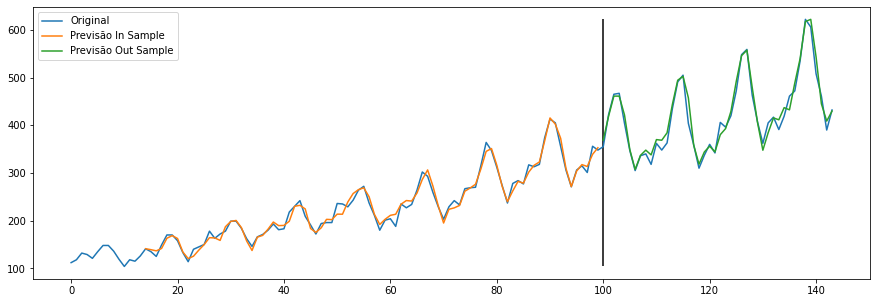

In [ ]:
original, previsto = treinar_avaliar(st1, .7, ajustar_arma, arma, [12,2], 14)

In [ ]:
medir(original, previsto, 14)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,252.629083,15.89431,0.05014,2.836819,0.443678,0.956772,0.045455


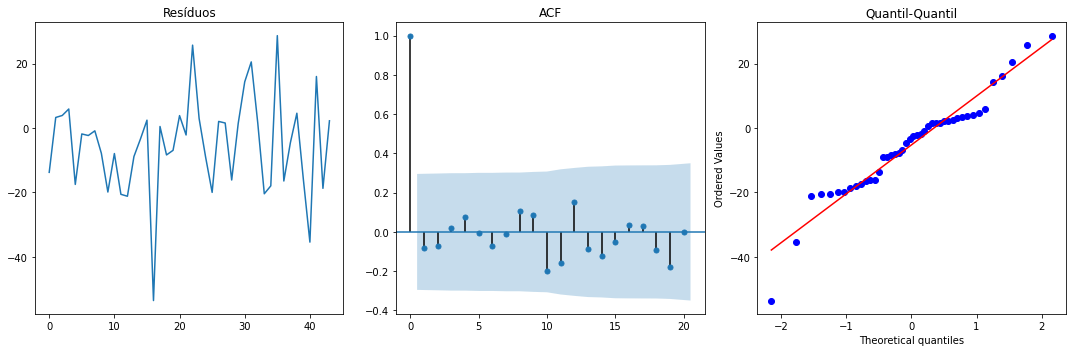

In [ ]:
analise_residuos(original, previsto, 14)

#### Dow Jones

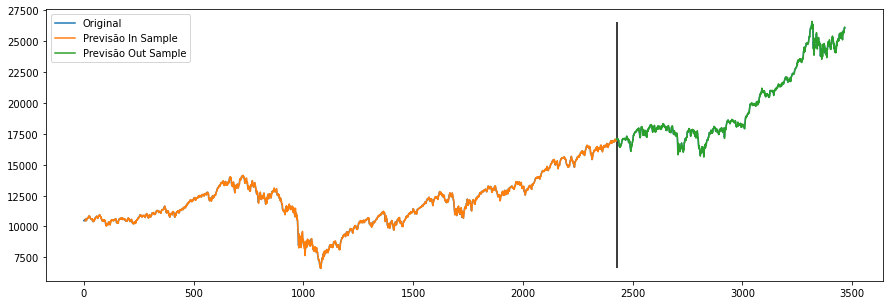

In [ ]:
original, previsto = treinar_avaliar(st2, .7, ajustar_arma, arma, [3,3], 6)

In [ ]:
medir(original, previsto, 6)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,13683.069748,116.974654,0.010839,0.404254,2.600712,0.99845,0.184438


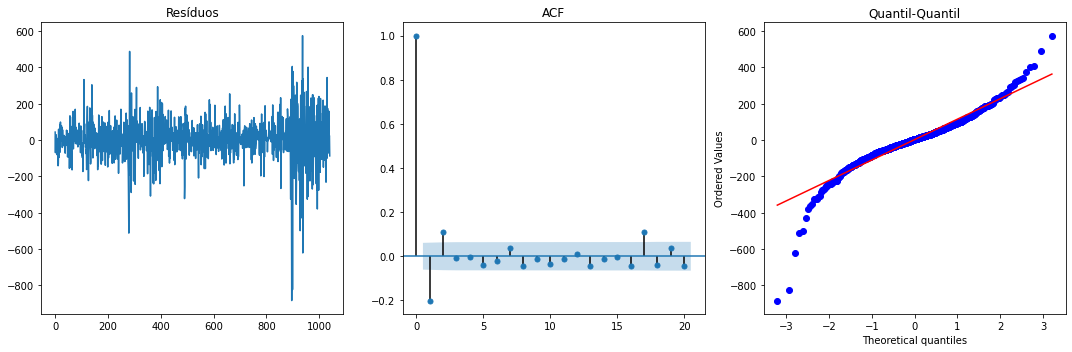

In [ ]:
analise_residuos(original, previsto, 6)

### Modelo ARIMA(p,d,q)

In [ ]:
def diferenciar(dados, ordem=1):
  tmp = dados
  for i in range(ordem):
    tmp2 = [tmp[i-1] - tmp[i] for i in range(1, len(tmp))]
    tmp2.insert(0,0)
    tmp = tmp2
  return np.array(tmp)

def integrar(dados, ordem=1, inicial = 0):
  tmp = dados
  tmp[0] = inicial

  for i in range(ordem):
    tmp2 = np.zeros(len(dados))
    for i in range(1, len(tmp)):
      tmp2[i] = tmp[i-1] + tmp[i] 
    tmp = tmp2
  return tmp

def ajustar_arima(dados, parametros):
  p, d, q = parametros
  dados_diff = diferenciar(dados, ordem=d)
  alfa = ajustar_ar(dados_diff, [p])
  previsoes_diff = ar(dados_diff, alfa)
  previsoes1 = integrar(previsoes_diff, d, inicial=dados[p]) 

  residuos1 = dados[p:] - previsoes1

  beta = ajustar_ar(residuos1, [q])
  previsoes_r = ar(residuos1, beta)
  residuos2 = residuos1[q:] - previsoes_r
  sigma = np.std(residuos2)
  return alfa, beta, d, sigma

def arima(dados, parametros):
  alfa, beta, d, sigma = parametros
  n = len(dados)
  p = len(alfa)
  q = len(beta)
  dados_diff = diferenciar(dados, d)
  previsoes_diff = ar(dados_diff, alfa)
  previsoes1 = integrar(previsoes_diff, d, inicial=dados[p])
  residuos1 = dados[p:] - previsoes1
  previsoes_res = ar(residuos1, beta)
  previsoes2 = previsoes1[q:] + previsoes_res 
  return previsoes2



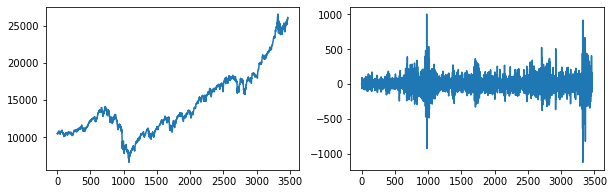

In [ ]:
st2d = diferenciar(st2, ordem=2)

fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(st2)
ax[1].plot(st2d)

#### Dow Jones

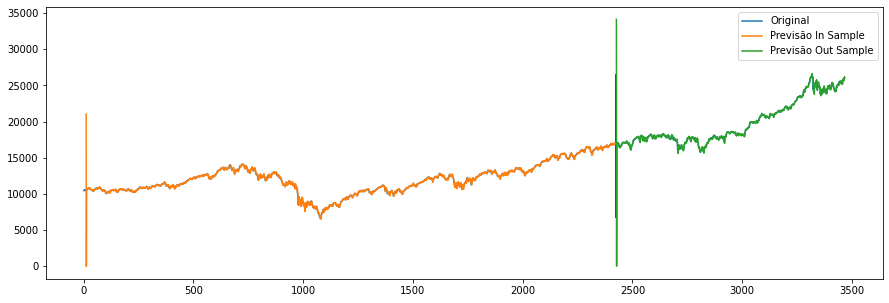

In [ ]:
original, previsto = treinar_avaliar(st2, .7, ajustar_arima, arima, [10, 1, 1], 11)

In [ ]:
medir(original, previsto, 11)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,586077.929685,765.557267,0.07094,0.778212,3.929712,0.933595,0.241114


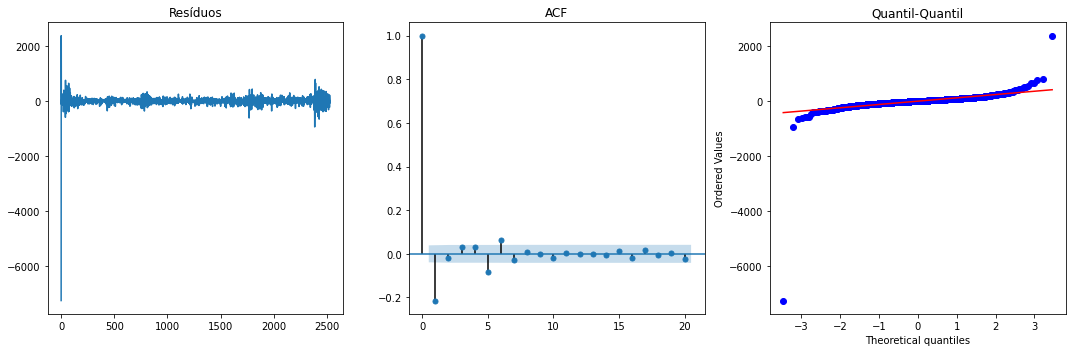

In [ ]:
analise_residuos(original, previsto, 11)

### Exponential Smoothing

In [ ]:
def es(Y, parametros):
  alfa, ordem = parametros
  n = len(Y)
  ret = np.zeros(n - ordem)
  for i in range(ordem, n):
    ret[i-ordem] = np.sum([alfa * (1 - alfa)** j * Y[i - j - 1] for j in range(0, ordem)])
  return ret

#### Passageiros

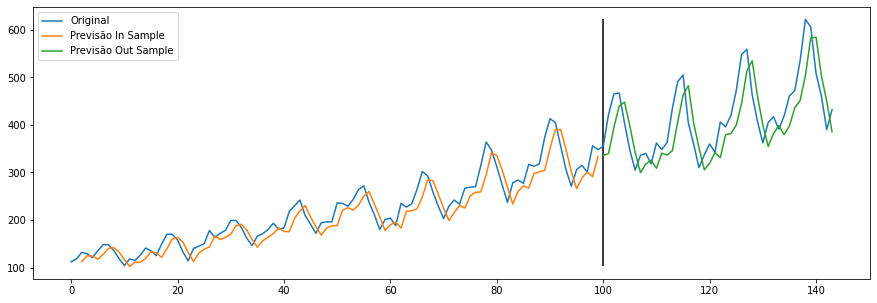

In [ ]:
es_treinar = lambda Y,P: P
original, previsto = treinar_avaliar(st1, .7, es_treinar, es, [.8, 2],2)

In [ ]:
medir(original, previsto, 2)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,3048.07,55.209329,0.174162,11.261938,1.664345,0.478433,0.204545


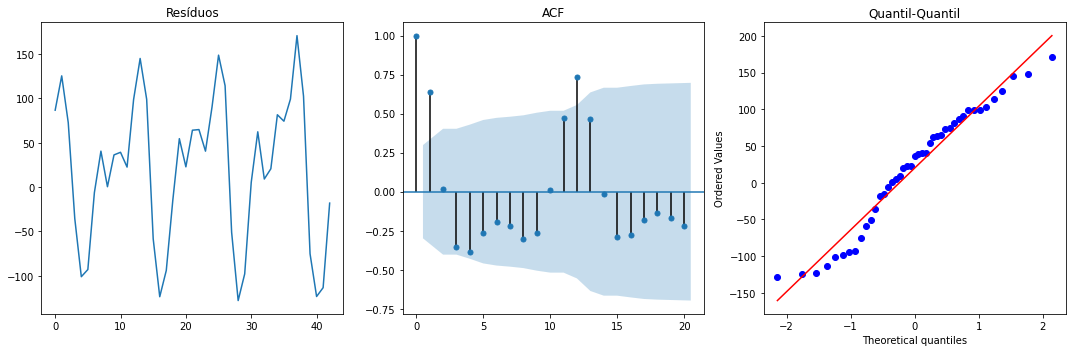

In [ ]:
analise_residuos(original, previsto[:-1], 3)

#### Dow Jones

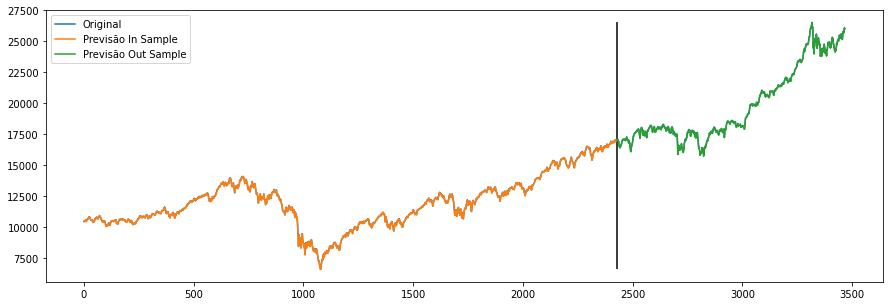

In [ ]:
es_treinar = lambda Y,P: P
original, previsto = treinar_avaliar(st2, .7, es_treinar, es, [.9, 3], 3)

In [ ]:
medir(original, previsto, 3)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,598.490893,24.464074,0.002267,0.109637,1.570086,0.999932,0.088377


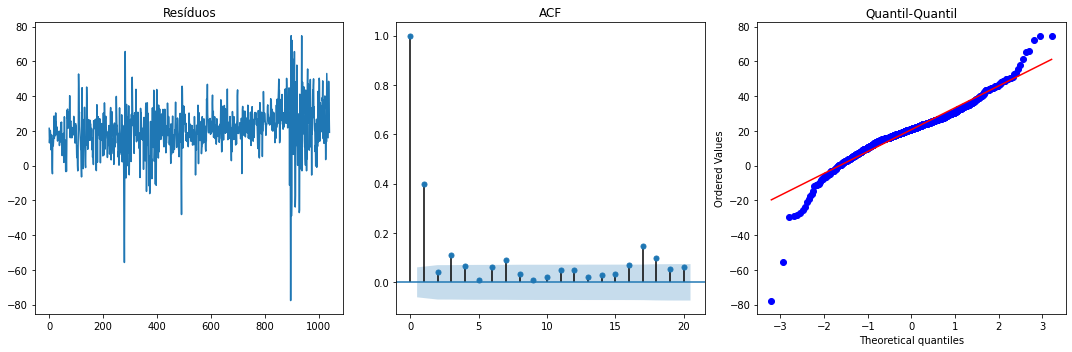

In [ ]:
analise_residuos(original, previsto, 3)

### Holt-Winters

In [ ]:
def holt_winters(dados, parametros):
  alfa, beta, gamma, m = parametros
  n = len(dados)
  L = np.zeros(n)
  L[:m+1] = dados[:m+1]
  T = np.zeros(n)
  T[:m+1] = diferenciar(dados[:m+1], 1)
  S = np.zeros(n)
  S[:m+1] = dados[:m+1]
  for t in range(m, n):
    L[t] = alfa * (dados[t-1] - S[t-m]) + (1 - alfa) * (L[t-1] + T[t-1])
    T[t] = beta * (L[t] - L[t-1]) + (1 - beta) * T[t-1]
    S[t] = gamma * (dados[t-1] -  L[t] - T[t-1]) + (1 - gamma) * S[t-m]

  return L[m:] + T[m:] + S[m:]

#### Passageiros

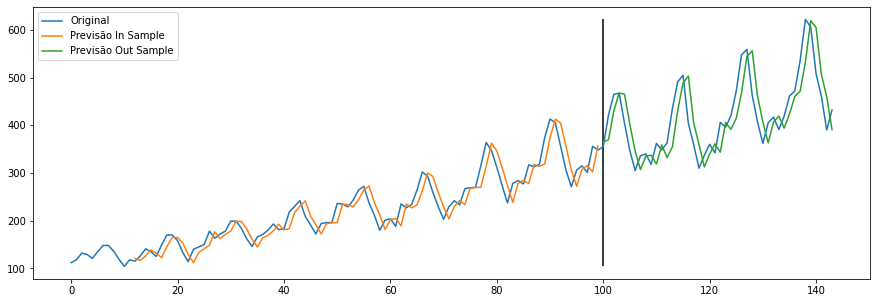

In [ ]:
hw_treinar = lambda Y,P: P
original, previsto = treinar_avaliar(st1, .7, hw_treinar, holt_winters, [.25, .1, .9, 12], 12)

In [ ]:
medir(original, previsto, 12)

,MSE,RMSE,nRMSE,MAPE,U,R2,MDE
0,2409.744615,49.08915,0.154855,9.862498,0.976716,0.587659,0.204545


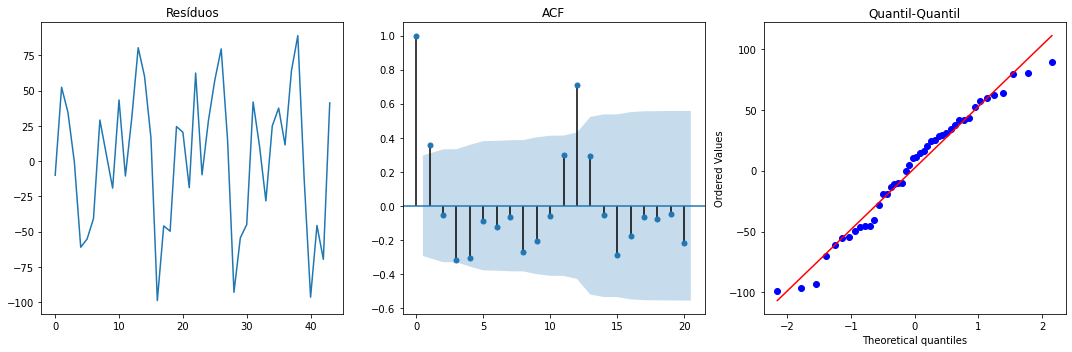

In [ ]:
analise_residuos(original, previsto, 12)